In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pprint import pprint

In [3]:
def wrap_around(i, size):
    """Helper function, to wrap indicies around a grid. Only works for square matrices."""
    return i % size


def flatten(a):
    """Flatten a n dimensional array into a n-1 dimensional array."""
    return a.reshape(-1, a.shape[-1])
    

def lookup(space, grid):
    """Helper function to look up a value in a given grid. Takes an array with an x and y coordinate."""
    return grid[tuple(space)]


def find_spaces(grid, value):
    """Helper function to find indices of a specific value."""
    return np.argwhere(grid == value)


def adjacent(space):
    """Calculates the indices of the adjacent spaces"""
    return flatten(np.array([space + np.array(adj) for adj in [[-1, 0], [0, 1], [1, 0], [0, -1]]]))


def get_subgrid(grid, origin, size=(7, 7)):
    x_size, y_size = grid.shape
    x_origin, y_origin = origin

    x_offset = int(size[0] / 2 if size[0] % 2 == 0 else (size[0] - 1) / 2)
    y_offset = int(size[1] / 2 if size[1] % 2 == 0 else (size[1] - 1) / 2)
    
    x_indices = wrap_around(np.arange(x_origin - x_offset, x_origin + x_offset + 1, dtype='int8'), x_size)
    y_indices = wrap_around(np.arange(y_origin - y_offset, y_origin + y_offset + 1, dtype='int8'), y_size)
    
    subgrid = np.zeros(size, dtype='int8')
    index_grid = np.zeros((size[0], size[1], 2), dtype='int8')

    for i, x in enumerate(x_indices):
        for j, y in enumerate(y_indices):
            subgrid[i, j] = grid[x, y]
            index_grid[i, j] = np.array([x, y])

    return subgrid, index_grid

Done at step 462
Yellow is Closed, Purple is Open
Samples in dataset: 463
Dark: Open, Yellow: Closed, Green: Private


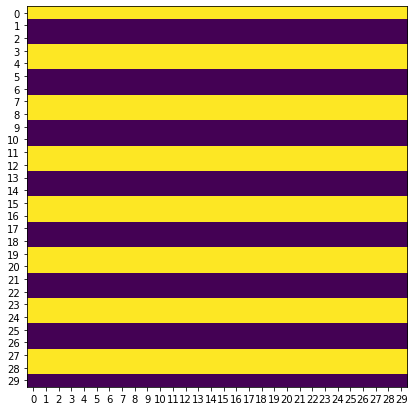

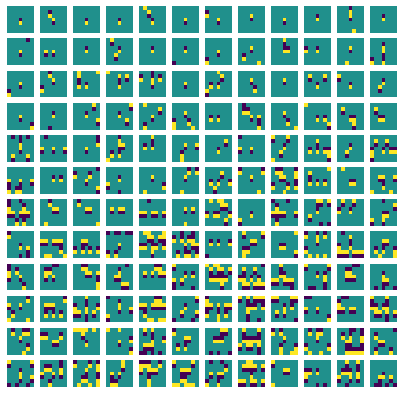

In [50]:
# the samples will then be fed to a svm for classification
x_row = []

# INITIALIZATION
# -- constants
AGGREGATION = "row"
GRID_SIZE = 30
ORIENTATIONS = [[-1, 0], [1, 0]]  # -- only allow vertical orientations in row mode.  #[[0, 1], [0, 1],  [0, -1] [0, -1]

# -- initialize empty grid
base = np.ones(GRID_SIZE, dtype='int')
base[1::4], base[2::4] = -1, -1

grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype="int8")

# # -- start with a random location.
open_x, open_y = np.random.randint(1, GRID_SIZE - 1, size=2)
clsd_y = open_y

if base[open_x - 1] != base[open_x]:
    clsd_x = open_x - 1

if base[open_x + 1] != base[open_x]:
    clsd_x = open_x + 1

# -- apply start location
grid[open_x, open_y] = base[open_x]
grid[clsd_x, clsd_y] = base[clsd_x]

# -- Save a copy of the subgrid for the dataset
subgrid, index_grid = get_subgrid(grid, [open_x, open_y])
x_row.append(subgrid)

STEPS = 1000

for i in range(STEPS):
    build_options = np.random.permutation(np.argwhere(grid == 0)) # subgrid == 0

    if len(build_options) > 0:
        open_x, open_y = build_options[0] # index_grid[tuple(build_options[0])]
        clsd_y = open_y

        if base[wrap_around(open_x - 1, GRID_SIZE)] != base[open_x]:
            clsd_x = wrap_around(open_x - 1, GRID_SIZE)

        if base[wrap_around(open_x + 1, GRID_SIZE)] != base[open_x]:
            clsd_x = wrap_around(open_x + 1, GRID_SIZE)

        # -- apply start location
        grid[open_x, open_y] = base[open_x]
        grid[clsd_x, clsd_y] = base[clsd_x]

        # -- Save a copy of the subgrid for the dataset
        subgrid, index_grid = get_subgrid(grid, [open_x, open_y])
        x_row.append(subgrid)

    else:
        print(f"Done at step {i}")
        break

print('Yellow is Closed, Purple is Open')
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.imshow(grid)
ax.set_xticks(np.arange(0, GRID_SIZE))
ax.set_yticks(np.arange(0, GRID_SIZE))

# # -- print dataset samples
fig, axs = plt.subplots(12, 12, figsize=(7,7))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(x_row[i])
    ax.set_xticks(np.arange(0, 7))
    ax.set_yticks(np.arange(0, 7))
    ax.axis('off')

plt.savefig('row_samples.png')
print("Samples in dataset:", len(x_row))
print('Dark: Open, Yellow: Closed, Green: Private')

In [52]:
np.save('row_aggr_450.npy', x_row[:450])

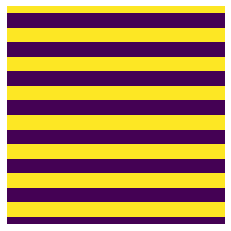

In [53]:
plt.imshow(grid)
plt.gca().set_xticks(np.arange(0, GRID_SIZE))
plt.gca().set_yticks(np.arange(0, GRID_SIZE))
plt.axis('off')

plt.savefig('row_aggr_450.png')